<a href="https://colab.research.google.com/github/bridgethom-99/Compiler-Construction/blob/main/Compiler_Construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members**

120790 Nicole Nyakundi

111724 Grace Lihasi Andesia

121060 Bridget Thomas Nyatichi

121521 Stephanie Achieng Otieno

121599 Susan Sagwa Ayago

# **LAB 1**

# **Flex**

**Definition**

*What is Flex?*

Flex is an acronym that stands for "fast lexical analyzer generator. " It is a free alternative to Lex, the standard lexical analyzer generator in Unix-based systems. Flex was originally written in the C programming language by Vern Paxson in 1987.("What is Flex? - Definition from WhatIs.com", 2022). It is a tool used to generate lexical analyzers.

**Diagram**


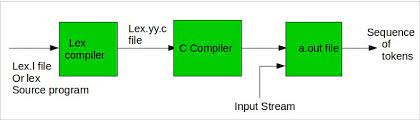

**Code** **Snippet**

The structure of the flex program is as follows:

Definition Section

%%

Rules Section

%%

User Code

**Definition Section**

In this section, flex tool converts the lex specifications to a lexical analyzer. This section contains global declarations and header files. 

**Rules Section**

This section contains the pattern and corresponding action. The pattern part contains a regular expression of the lexical analyzer and the action part is a code, which will be executed when a pattern matches with the input.

**User Defined Section**

This section contains any valid code. 

**Some additional rules used in Flex regular expression:**

[abcd] - 
    A bracketed expression describes a set of characters. Expression [abcd] is equivalent to (a|b|c|d). 

[0-9] - 
    In brackets, a dash indicates a range of characters. For example, [a-zA-Z] matches any single letter. If you want a dash as one of the characters, put it first. 

[^abcd] - 
    This indicates any character except a, b, c or d. For example, [^a-zA-Z] matches any nonletter. 

. - 
    Dot is the same as [^\n]. That is, it is any character except a newline character. 

A+ - 
    A+ is equivalent to AA*, So it matches one or more members of A in a row. 

A? - 
    A? stands for zero or one occurrence of A. So it is an optional A. 

A/B - 
    A, but only when followed by B. 

**Additionally,** The command   flex FlexProgram.l or flex FlexProgram.lex acording to how the file has been saved will run flex. If there are no errors, it will write file lex.yy.c. 

The executable file **a.exe** is produced after running **gcc lex.yy.c**. When the executable file runs, it analyzes its input for occurrences of the regular expressions. Whenever it finds one, it executes the corresponding C code.  



```
%{
	/*To find whether given letter is a vowel or not*/
#undef yywrap
#define yywrap() 1
	void display(int);
%}

%%

[a|e|i|o|u|] {
		int flag=1;
		display(flag);
		return;
		}

.+ {
	int flag=0;
	display(flag);
	return;
	}
	
%%

void display(int flag)
{
	if(flag==1)
		printf("The given letter [%s] is a vowel",yytext);
	else
		printf("The given letter [%s] is NOT a vowel",yytext);		
}

main()
{
	printf("Enter a letter to check if it is a vowel or not: ");
	yylex(); 
}
```



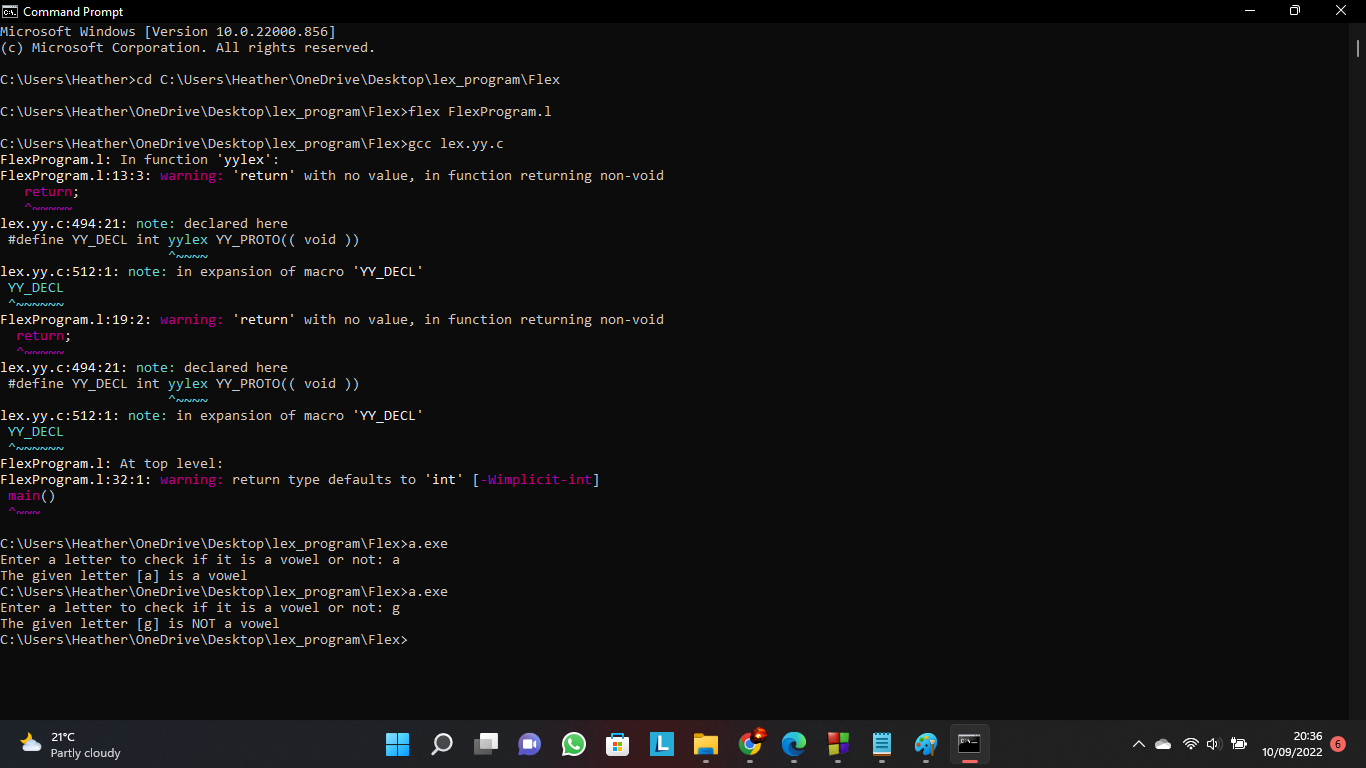

# **Bison**

**Definition**

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR (1) parser tables.The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

**Diagram**

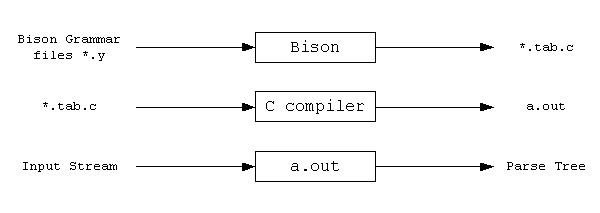

**Code** **Snippet**

Bison is a program that parses a text stream and generates a parse tree. The input file for the Bison utility is a Bison grammar file. The general form of a Bison grammar file is as follows:

%{

Prologue

%}

Bison declarations

%%

Grammar rules

%%

Epilogue


Bison.l
```
%{

#include <stdio.h>
#include <string.h>
#include "bison.tab.h"
void showError();
%}


numbers     ([0-9])+
alpha       ([a-zA-Z])+

%%

{alpha}			   {sscanf(yytext, "%s", yylval.name); return (STRING);}
{numbers}      {yylval.number = atoi(yytext); return (NUM);}
";"      		   {return (SEMICOLON);}
.      		     {showError(); return(OTHER);}

%%


void showError(){
    printf("Other input");
}
int yywrap(){
    return 1;
}
```




Bison.y
```

%{
#include <stdio.h>

int yylex();
int yyerror(char *s);

%}

%token STRING NUM OTHER SEMICOLON

%type <name> STRING
%type <number> NUM

%union{
	  char name[20];
    int number;
}

%%

prog:
  stmts
;

stmts:
		| stmt SEMICOLON stmts

stmt:
		STRING {
				printf("Your entered a string - %s", $1);
		}
		| NUM {
				printf("The number you entered is - %d", $1);
		}
		| OTHER
;

%%

int yyerror(char *s)
{
	printf("Syntax Error on line %s\n", s);
	return 0;
}

int main()
{
    yyparse();
    return 0;
}
```



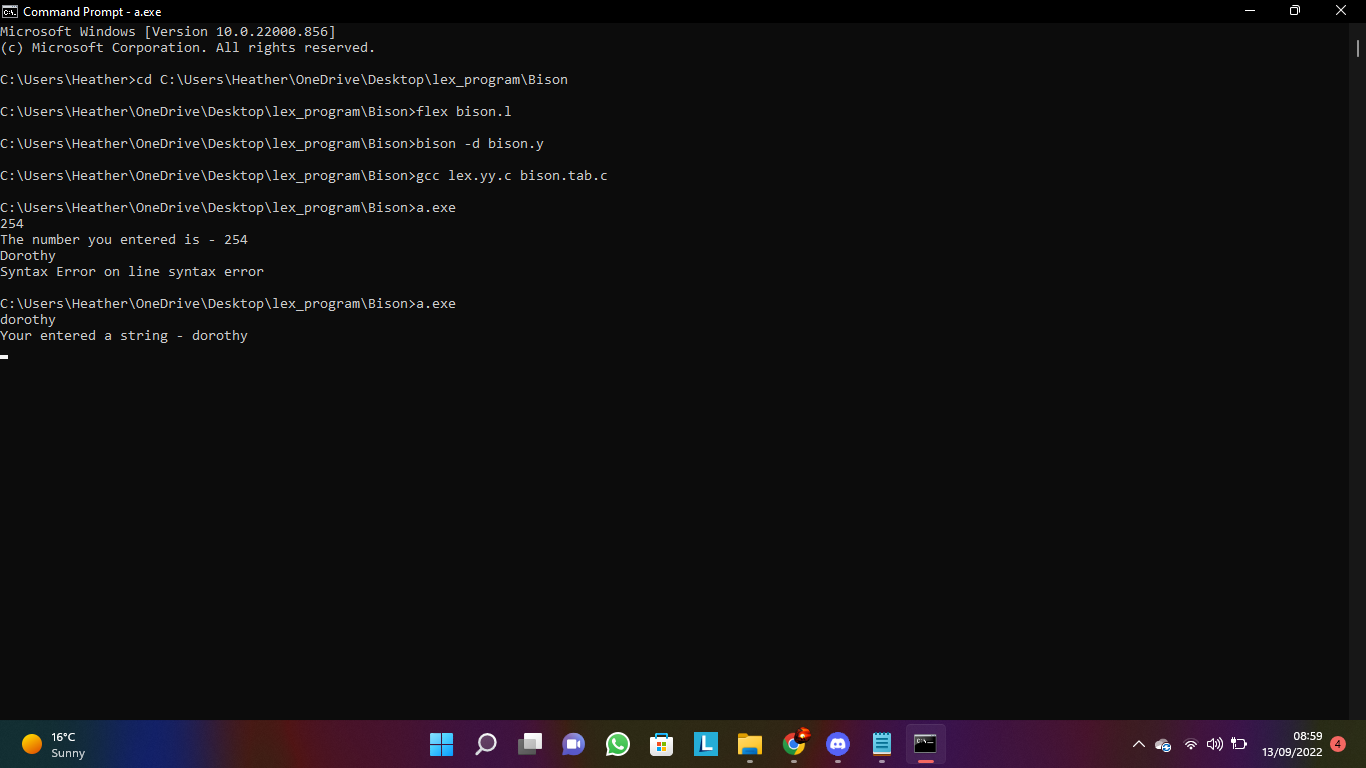

# **Lex**

**Definition**

Lex is a program that generates lexical analyzer. The lexical analyzer is a program that transforms an input stream into a sequence of tokens. It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.

The function of Lex is as follows:
*   Firstly lexical analyzer creates a program lex.1 in the Lex language. Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
* Finally C compiler runs the lex.yy.c program and produces an object program a.out. 
*   a.out is lexical analyzer that transforms an input stream into a sequence of tokens.

**Diagram**

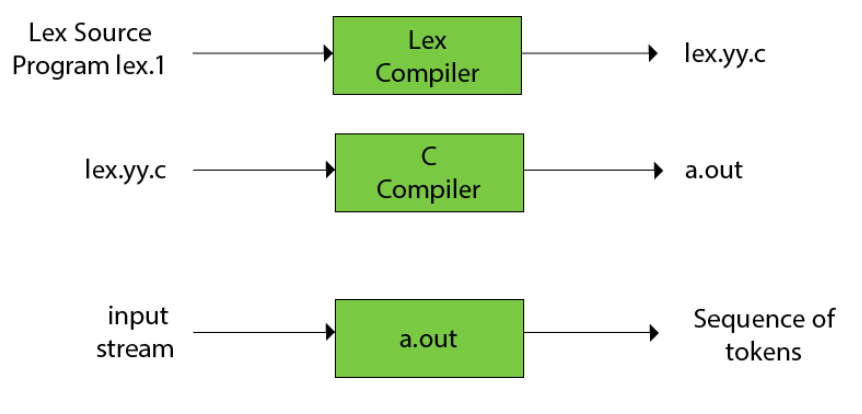

**Code** **Snippet**

The structure of the lex program is as follows:

Definition section

%%

Rules section

%%

User Subroutine section  

The Definition section is the place to define macros and import header files written in the chosen language. It is also possible to write any code here, which will be copied verbatim into the generated source file. It is bracketed with %{ and %}.

The Rules section is the most important section; Each rule is made up of two parts: a pattern and an action separated by whitespace. The lexer that generates text will execute actions associated with each rule when it recognizes input matching its patterns. It is bracketed with %% & %%.

The User Subroutine section contains all procedures required for execution of code by rules in other sections of the program. This is where all C statements and functions are defined that are copied verbatim into generated source file copy them without modification.




```
/*lex program to count number of words*/
%{
#include<stdio.h>
#include<string.h>
int i = 0;
%}
  
/* Rules Section*/
%%
([a-zA-Z0-9])*    {i++;} /* Rule for counting 
                          number of words*/
  
"\n" {printf("%d\n", i); i = 0;}
%%
  
int yywrap(void){}
  
int main()
{   
    // The function that starts the analysis
    yylex();
  
    return 0;
}
```



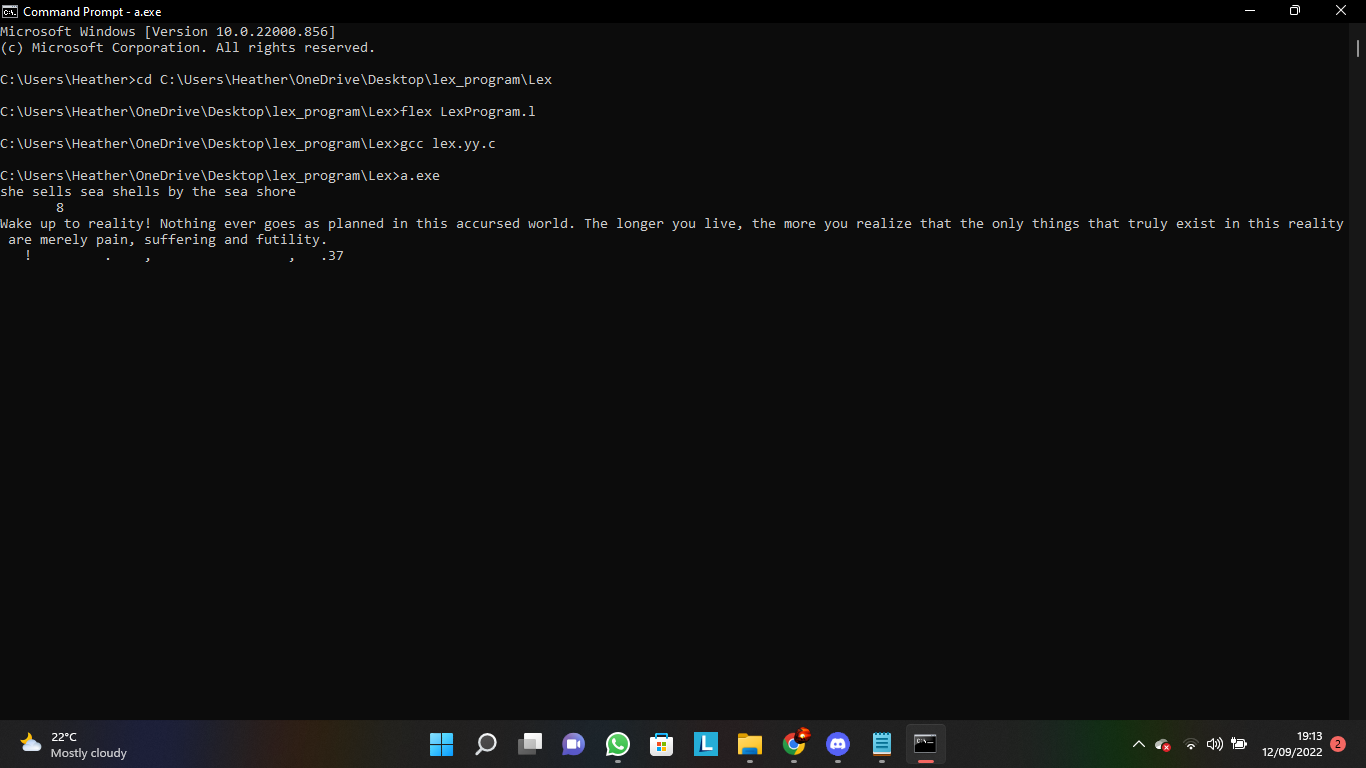

# **Yacc**

**Definition**

*What is Yacc?*



Yacc (for “yet another compiler compiler.”) is the standard parser generator for the Unix operating system. An open source program, yacc generates code for the parser in the C programming language. The input to yacc describes the rules of a grammar. Yacc uses these rules to produce the source code for a program that parses the grammar. You can then compile this source code to obtain a program that reads input, parses it according to the grammar, and takes action based on the result. (IBM- "How Yacc Works", 2021)


**Diagram**

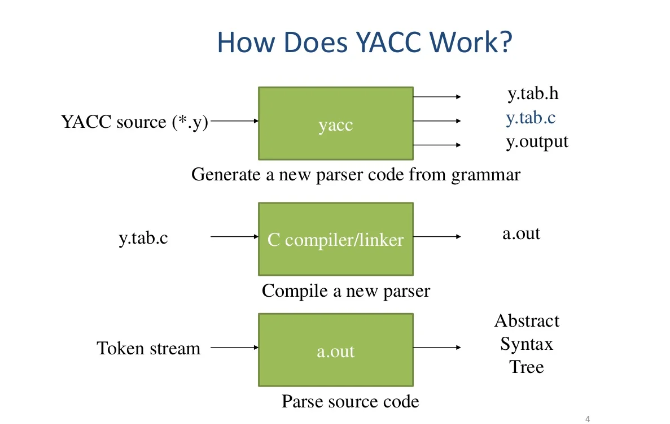

**Code** **Snippet**

A YACC source program is structurally similar to a LEX one.

declarations

%%

rules

%%

routines

The declarations section of Yacc contains the following items:

-Declarations of tokens. Yacc requires token names to be declared as such using the keyword %token.

-Declaration of the start symbol using the keyword %start

-declarations: included files, global variables, types.

-code between %{ and %}.

-RULES SECTION.

A rule has the form:

nonterminal : sentential form      
            | sentential form       
            ; 
            
Actions may be associated with rules and are executed when the associated sentential form is matched.


Yacc.l
```
%{
#include "Yacc.tab.h"
void yyerror (char *s);
int yylex();
%}
%%
"print"				   {return print;}
"exit"				   {return exit_command;}
[a-zA-Z]			   {yylval.id = yytext[0]; return identifier;}
[0-9]+                 {yylval.num = atoi(yytext); return number;}
[ \t\n]                ;
[-+=;]           	   {return yytext[0];}
.                      {ECHO; yyerror ("unexpected character");}

%%
int yywrap (void) {return 1;}
```



Yacc.y

```
%{
void yyerror (char *s);
int yylex();
#include <stdio.h>     /* C declarations used in actions */
#include <stdlib.h>
#include <ctype.h>
int symbols[52];
int symbolVal(char symbol);
void updateSymbolVal(char symbol, int val);
%}

%union {int num; char id;}         /* Yacc definitions */
%start line
%token print
%token exit_command
%token <num> number
%token <id> identifier
%type <num> line exp term 
%type <id> assignment

%%

/* descriptions of expected inputs     corresponding actions (in C) */

line    : assignment ';'		{;}
		| exit_command ';'		{exit(EXIT_SUCCESS);}
		| print exp ';'			{printf("Printing %d\n", $2);}
		| line assignment ';'	{;}
		| line print exp ';'	{printf("Printing %d\n", $3);}
		| line exit_command ';'	{exit(EXIT_SUCCESS);}
        ;

assignment : identifier '=' exp  { updateSymbolVal($1,$3); }
			;
exp    	: term                  {$$ = $1;}
       	| exp '+' term          {$$ = $1 + $3;}
       	| exp '-' term          {$$ = $1 - $3;}
       	;
term   	: number                {$$ = $1;}
		| identifier			{$$ = symbolVal($1);} 
        ;

%%                     /* C code */

int computeSymbolIndex(char token)
{
	int idx = -1;
	if(islower(token)) {
		idx = token - 'a' + 26;
	} else if(isupper(token)) {
		idx = token - 'A';
	}
	return idx;
} 

/* returns the value of a given symbol */
int symbolVal(char symbol)
{
	int bucket = computeSymbolIndex(symbol);
	return symbols[bucket];
}

/* updates the value of a given symbol */
void updateSymbolVal(char symbol, int val)
{
	int bucket = computeSymbolIndex(symbol);
	symbols[bucket] = val;
}

int main (void) {
	/* init symbol table */
	int i;
	for(i=0; i<52; i++) {
		symbols[i] = 0;
	}

	return yyparse ( );
}

void yyerror (char *s) {fprintf (stderr, "%s\n", s);} 
```



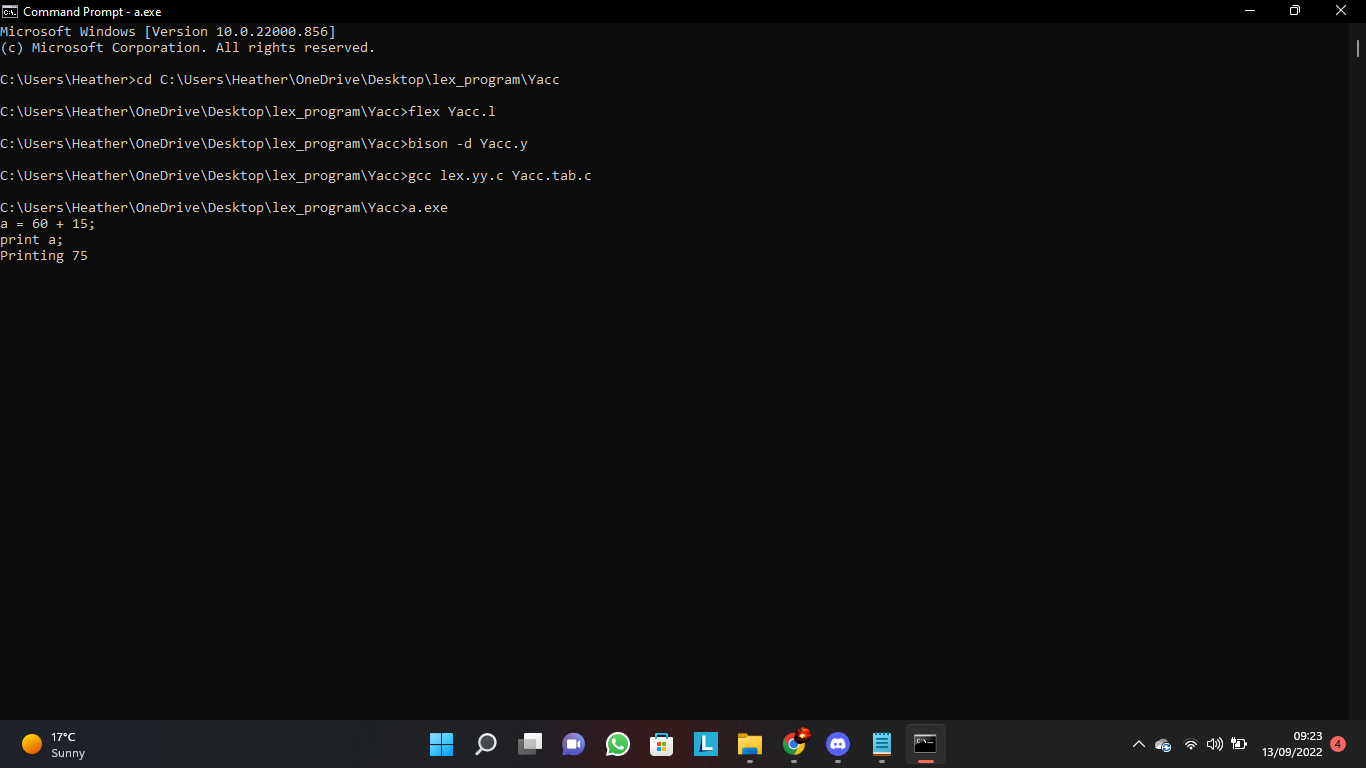

# **LAB 2**

Part 1 of Lab 2 has already been in done in the previous lab as seen in Bison and Flex.

NFA to DFA Conversion
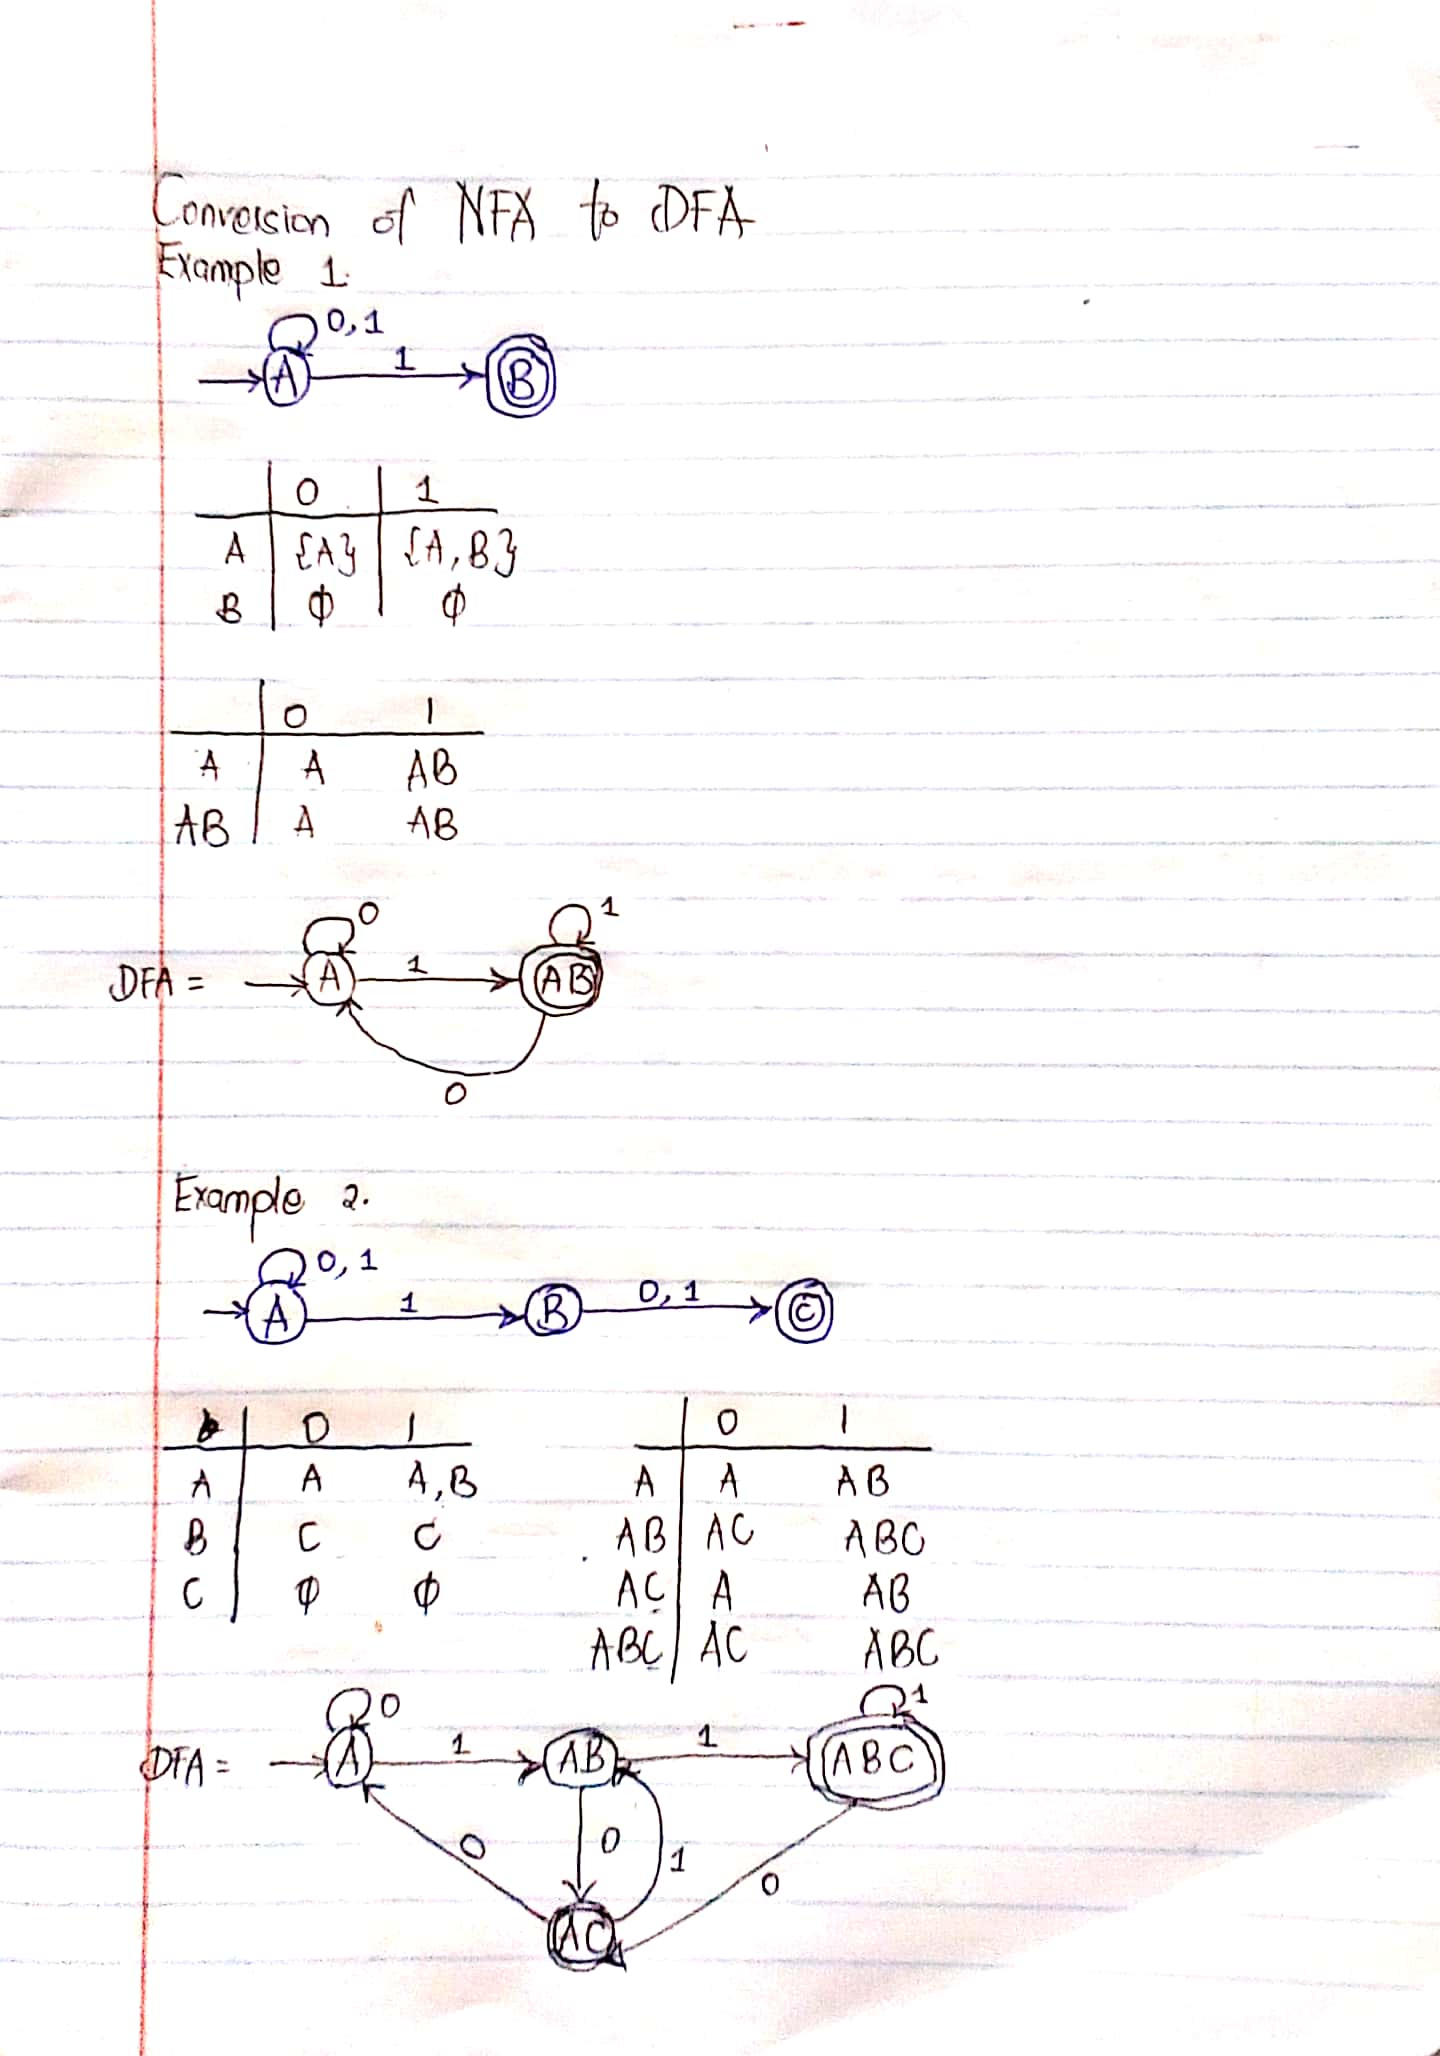

# **LAB 3**

As seen in the Flex compiler done in Lab 1 above, the flex input file and its structure are well elaborated.

# **LAB 4**

**Predictive Parsing**

Predictive parsing is a special form of recursive descent parsing where no backtracking is required, so this can predict which products to use to replace the input string.

This parsing technique is regarded recursive as it uses context-free grammar which is recursive in nature.

The figure below illustrates how predictive parsing works. It has the **input buffer** which includes the string to be passed followed by $, **the stack** which contains a combination of grammar symbols with a dollar sign at the bottom and a **Parsing table** which is a two-dimensional array or Matrix M [A, a] where A is nonterminal and 'a' is a terminal symbol. 

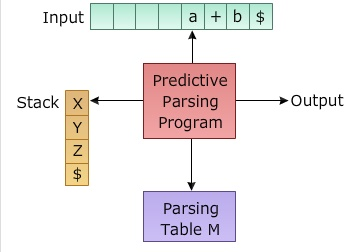


**LL (1) Parsing**

A top-down parser that uses a one-token lookahead is called an LL(1) parser.

The 1st L represents that the scanning of the Input will be done from Left to Right manner and the second L shows that in this parsing technique we are going to use Left most Derivation Tree. And finally, the 1 represents the number of look-ahead, which means how many symbols are you going to see when you want to make a decision *(LL(1) parsers (4)).*

**First () and Follow () Function**

The first () function is used to fill in the entries of the M-table associated with the grammar. It is a function that gives the set of terminals that begin the strings derived from the production rule *(First and Follow - Gate Vidyalay (2))*. 

The follow () function is done by using the terminal symbol which follows a variable in the process of derivation. 

First(α) is a set of terminal symbols that begin in strings derived from α.

Follow(α) is a set of terminal symbols that appear immediately to the right of α *(Dmitry Soshnikov (3))*.



**Rules used in finding the first () and follow ()**

* ε  may appear in the first function of a non-terminal but not in the follow of a non-terminal.
*   If left recursion is present in the grammar, it needs to first be eliminated before calculating the first and follow function.
*   The follow function of a non-terminal is calculated by first looking where it is present on the RHS of a production rule.






**The main roles of the first and follow functions are:**

1.   It is used to prove the LL (K) characteristic of grammar.
2.   It is used to promote the construction of predictive parsing tables.
3.   It provides selection information for recursive descent parsers.
4.   It is used to determine which next production to use.
5.   It is used by the parser for it to properly apply the needed rule at the correct position for a given grammar.


**Top-down Parsing Unique Attributes**

1.   There must be precedence and associativity of all operator.

1.   There musn't be left recursion.

1.   Implement your attribute grammar in a C++ class named Parser. The Parser class should contain a method named Parser::Parse() that returns the value of a single statement in the language.
2.  Implement error recovery in your parser.





# **LAB 5**

1.Review what syntax analysis is and in a few words, describe what this phase of compiler
construction entails.

**Syntax Analysis**

Syntax analysis is the second phase of the compilation process after lexical analysis. Here, the given input string is checked for the confirmation of rules and structure of the formal grammar. This is done by analysing the syntactical structure and checking if the given input is in the correct syntax of the programming language.


Syntax analysis is also known as the parse tree or syntax tree which is developed with the help of pre-defined grammar of the language. The syntax analyser checks whether a given program fulfills the implied CFG rules and if it does, the parser creates the parse tree. If not, the parser displays an error message.

**Importance of a syntax analyser**

* Checks if the code is grammatically valid.
* Assists in the application of the rules to the code.
* Ensures that each opening brace has a correspocorresponding closing balance.

---

**Important tasks performed by the parser**

* Detecting and reporting all types of syntax errors by rejecting invalid texts.
* Finding the position where an error has occurred.
* Describing the error accurately and clearly.
* Recover from an error and continue computation to find further errors.
* Converting a string of characters easy for humans to write into a data structure that is easy for programs to process.

This is as illustrated in the figure below (Syntax Analysis: Compiler Top Down & Bottom Up Parsing Techniques - (5)).

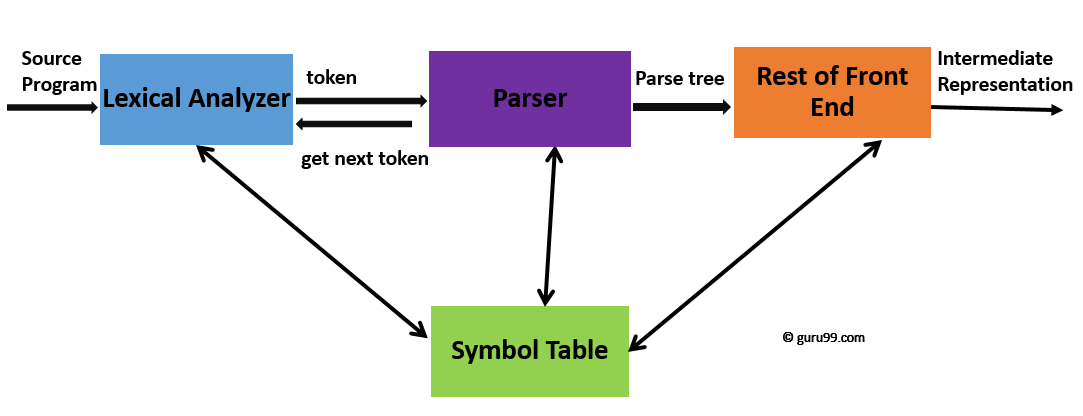


The parsing techniques are as follows:


1.  Top-Down Parsing
2.  Bottom-Up Parsing



**1.  Top-Down Parsing**

Top-down parsing is a parsing technique that first looks at the highest level of the parse tree and works down the parse tree by using the rules of grammar.

An example of a top down parser is a Recursive Descent parser.

**2.  Bottom-Up Parsing**

It is a parsing technique that first looks at the lowest level of the parse tree and works up the parse tree by using the rules of grammar.

An example of a bottom up parser is a Shift Reduce parser.


Some differences of these two parsing techniques include:

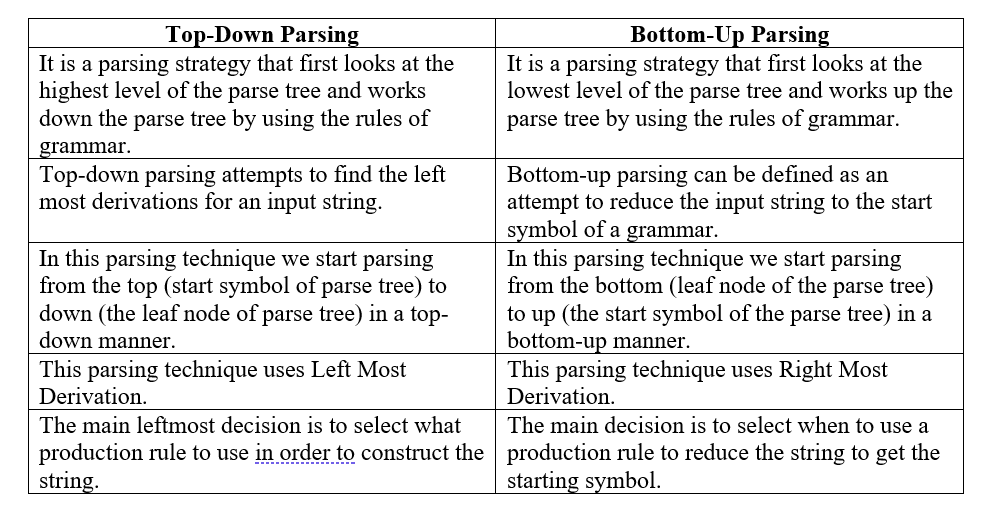

**Derivation**

**A derivation** is basically a sequence of production rules, in order to get the input string. During parsing, we take two decisions for some sentential form of input:

Deciding the non-terminal which is to be replaced.

Deciding the production rule, by which, the non-terminal will be replaced.

To decide which non-terminal to be replaced with production rule, we can have two options.

**Left-most Derivation**
If the sentential form of an input is scanned and replaced from left to right, it is called left-most derivation. The sentential form derived by the left-most derivation is called the left-sentential form.

**Right-most Derivation**
If we scan and replace the input with production rules, from right to left, it is known as right-most derivation. The sentential form derived from the right-most derivation is called the right-sentential form (Compiler Design - Syntax Analysis - Tutorialspoint(9)).

**Example**

***Production Rules***

S = S + S  
S = S - S  
S = a | b |c 

***Input:***

a - b + c

***Left Most Derivation:***

S = S + S  
S = S - S + S  
S = a - S + S  
S = a - b + S  
S = a - b + c  

***Right Most Derivation:***

S = S - S  
S = S - S + S  
S = S - S + c  
S = S - b + c  
S = a - b + c  

**Parse Tree**

Parsing is the process of breaking a string into its constituent parts, or symbols. These symbols are sometimes called tokens, and they make up the parse tree.

In parsing, the string is derived using the start symbol. The root of the parse tree is that start symbol.

Parse trees follow precedence rules when determining how operators are cast out from their initial positions. For example: if an expression begins with a left parenthesis (parenthesis is considered a non-terminal symbol), then it has precedence over every other non-terminal symbol in its immediate parenthesis (that is, any sub-tree deeper than it). This means that it will be cast out before any other non-terminal symbols within that left parenthesis (Parse Tree in Compiler Design - GeeksForeGeeks(10)).

**Example**

We take the left-most derivation of a + b * c

The left-most derivation is:

E → E * E

E → E + E * E

E → id + E * E

E → id + id * E

E → id + id * id

This is as seen below(Parse Tree - Javatpoint(10))

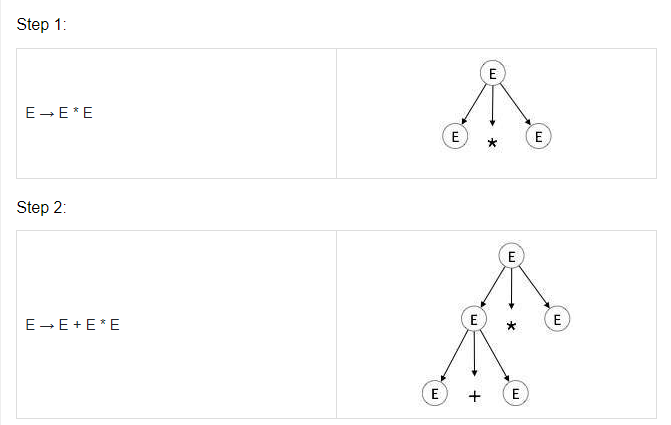

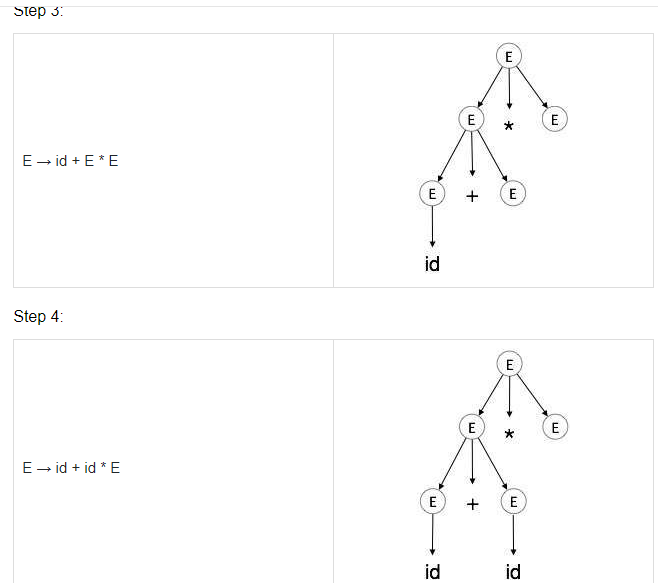

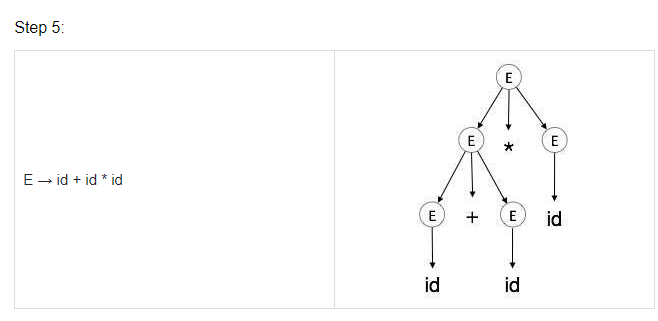

**Syntax Analyser Code Snippet**

2.Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple
syntax analyzer. 

Flex and Bison are tools for building programs that handle structured input.The lexical phase (scanner) groups characters into lexical units or tokens.
The input to the lexical phase is a character stream. The output is a
stream of tokens.The parser groups tokens into syntactical units. The output of the parser
is a parse tree representation of the program. Context-free grammars are
used to define the program structure recognized by a parser

**Flex code**



A flex program consists of three sections, separated by %% lines. The first section contains declarations and option settings. The second section is a list of patterns and actions, and the third section is C code that is copied to the generated scanner, usually small routines related to the code in the actions.

In [ ]:
/* just like Unix wc */

%{
int chars = 0;

int words = 0;

int lines = 0;

%}


%%

[a-zA-Z]+  { words++; chars += strlen(yytext); }

\n         { chars++; lines++; }

.          { chars++; }


%%

main(int argc, char **argv)

{

  yylex();

  printf("%8d%8d%8d\n", lines, words, chars);

}

**Bison code**

Let's use the following expression

1 * 2 + 3 * 4 + 5







In [ ]:
<exp> ::= <factor> 
      | <exp> + <factor>
<factor> ::= NUMBER
      | <factor> * NUMBER

In order to write a parser, we need some way to describe the rules the parser uses to turn a sequence of tokens into a parse tree. The most common kind of language that computer parsers handle is a context-free grammar (CFG)

The standard form to write down a CFG is Backus-Naur Form (BNF)
Each line is a rule that says how to create a branch of the parse tree.

 In BNF, ::= can be read “is a” or “becomes,” and | is “or,” another way to create a branch of the same kind. The name on the left side of a rule is a symbol or term. By convention, all tokens are considered to be symbols, but there are also symbols that are not tokens.

# **NB: LEXICAL ANALYSIS SUMMARY**

A quick summary of the frontend in compiler Construction.

Use a string example e.g. x+2*y to show the work of the various phases of the frontend.



**Lexical Analysis**

Lexical analysis is the process of converting a string of characters from a source program into a string of tokens.

A lex is a computer program that creates lexical analyzers

A lexical analyzer/lexer/scanner is a program that analyzes words.

The lexical analyzer's responsibilities include the following:

* Input characters are read from the source program.
* Error messages are related to the source program.
* Removing white spaces and comments from the source code
* Adding identified tokens to the symbol table





The lexical analyzer's token sequence allows the parser to analyze the syntax of a programming language.

A token is a valid sequence of characters given by a lexeme that is treated as a unit in the programming language's grammar.
In a programming language, this could be;

* Keywords
* Operators
* Punctuation marks
* Constants
* Identifiers
* Numbers

A pattern is a rule that is matched by a token's sequence of characters (lexemes).
Regular expressions or grammar rules can be used to define it.

**Example of Lexical Analysis, Tokens, Non-Tokens (In code)**



```
#include <stdio.h>
    int maximum(int x, int y) {
        // This will compare 2 numbers
        if (x > y)
            return x;
        else {
            return y;
        }
    }
```



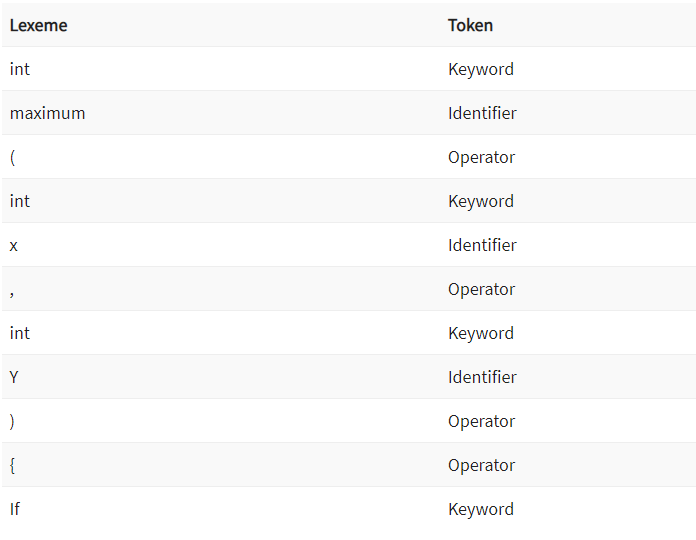

**Nontokens created from piece of code above**

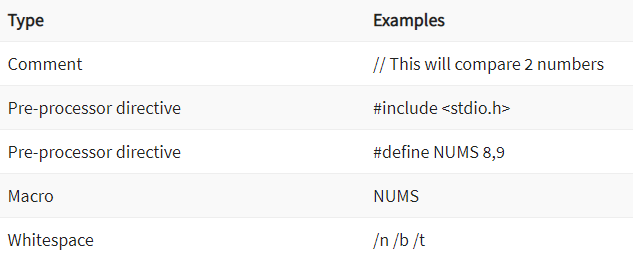

The lexical analysis procedure is divided into two stages.

* Scanning entails reading input characters and removing white spaces and comments.
* Tokenization is the process of producing tokens as output.

**Architecture of lexical analyzer**

The lexical analyzer's primary task is to scan the entire source program and identify tokens one by one.
Scanners are used to generate tokens when the parser requests them.

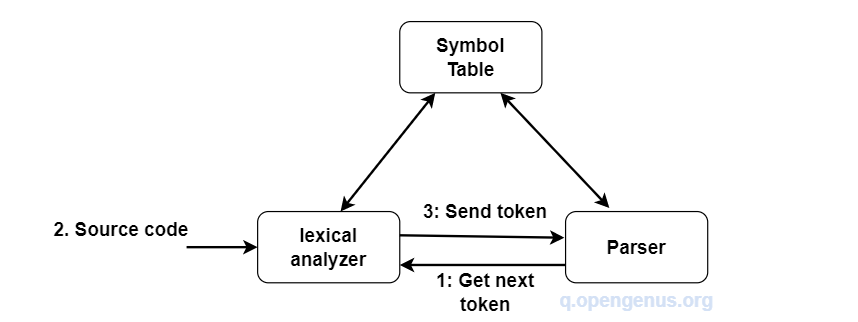

**Steps:**

* The parser sends "get next token" to the lexical analyzer.
* The lexical analyzer scans the input until it finds the "next token."
* The parser receives the token.

**Lexical Errors**

A lexical error is a character sequence that cannot be scanned into any valid token. Important lexical error information:

* Lexical errors are uncommon, but they should be handled by a scanner.
* Misspellings of identifiers, operators, and keywords are lexical errors.
* A lexical error is typically caused by the appearance of an illegal character, usually at the start of a token.

Here are a few of the most common error recovery methods:

* Removes one of the remaining characters from the input
* In panic mode, all subsequent characters are ignored until we reach a well-formed token.
* By substituting the missing character for the remaining input
* Replace one character with another.
* Transpose two characters from a serial.

**Advantages of Lexical Analysis**

* Lexical analyzer method is used by programs like compilers which can use the parsed data from a programmer’s code to create a compiled binary executable code
* It is used by web browsers to format and display a web page with the help of parsed data from JavsScript, HTML, CSS
* A separate lexical analyzer helps you to construct a specialized and potentially more efficient processor for the task

**Disadvantages of Lexical Analysis**

* You must devote significant time to reading the source code and partitioning it into tokens.
* Some regular expressions are more difficult to grasp than PEG or EBNF rules.
More work is required to create and test the lexer and its token descriptions.
* To generate the lexer tables and construct the tokens, additional runtime overhead is required.

# **LAB 6**

**Quick Summary of the Front-end**

 **Lexical** **Analysis** is the first phase of the compiler also known as a scanner. It converts the high level input program into a sequence of tokens. The output is a sequence of tokens that is sent to the parser for syntax analysis.

**Example**

As an example, consider the expression:

c = a + b * 5

**Tokens created from piece of code above**

**Lexeme** is an instance of a token, which is a sequence of characters included in the source program based on a token's matching pattern.

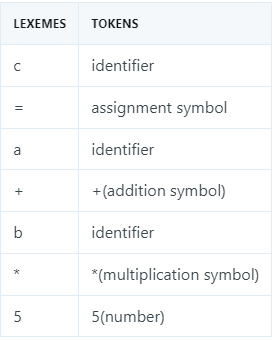

**Syntax Analysis or Parsing** is the second phase after lexical analysis. It checks the syntactical structure of the given input, i.e. whether the given input is in the correct syntax (of the language in which the input has been written) or not. It does so by building a data structure, called a Parse tree or Syntax tree. 

**Example** 
Based on the rules below we can solve the expression:

expr? expr op expr | num | id

op? + | - | *

For the expression c = a + b * 5

**Using the leftmost derivation:**


expr op expr

id < a > op expr

id < a > + expr

id < a > + expr op expr

id < a > + id < b > op expr

id < a > + id < b > * expr

id < a > + id < b > * num < 5 >

**Parse Tree**
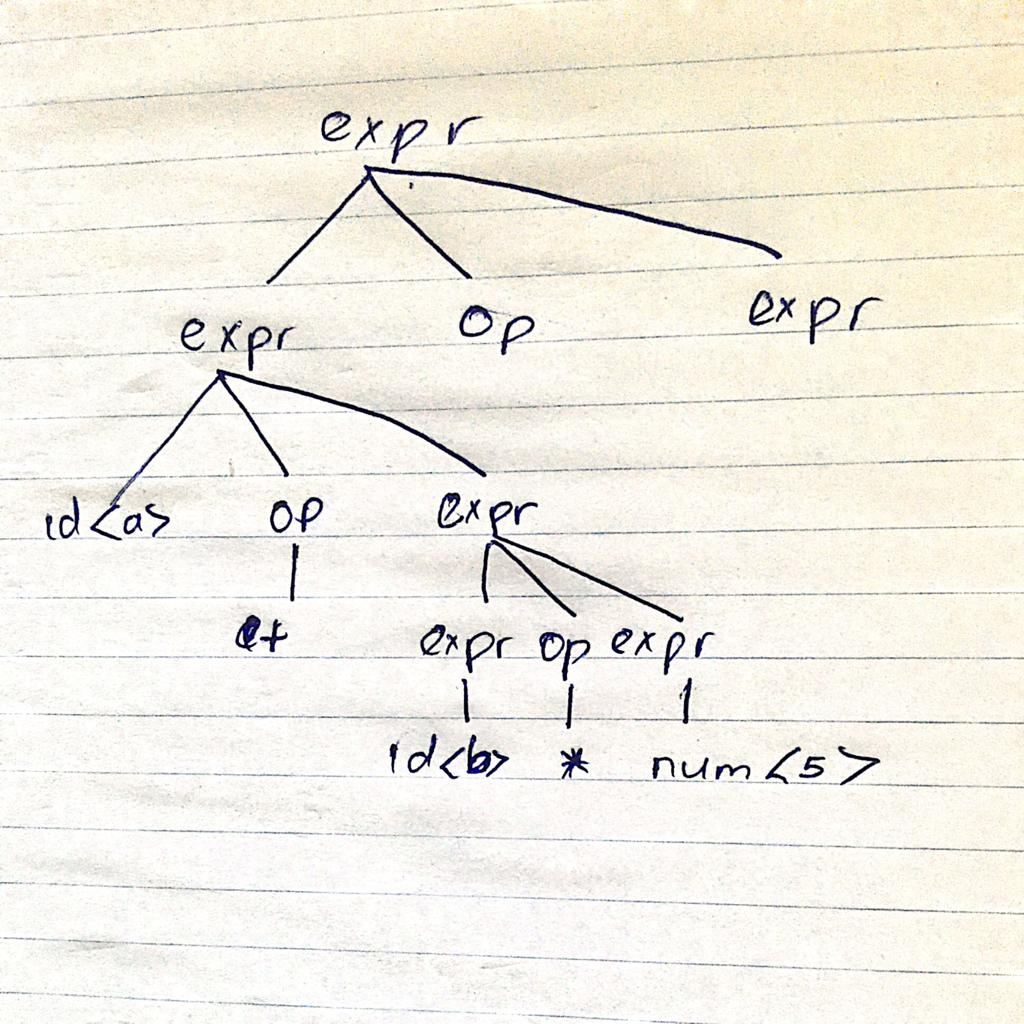

**Using the Rightmost derivation:**

expr op expr

expr op num < 5 >

expr * num < 5 >

expr op expr * num < 5 >

exp op id < b > * num < 5 >

exp + id < b > * num < 5 >

id < a > + id < b > * num < 5 >

**Parse Tree**
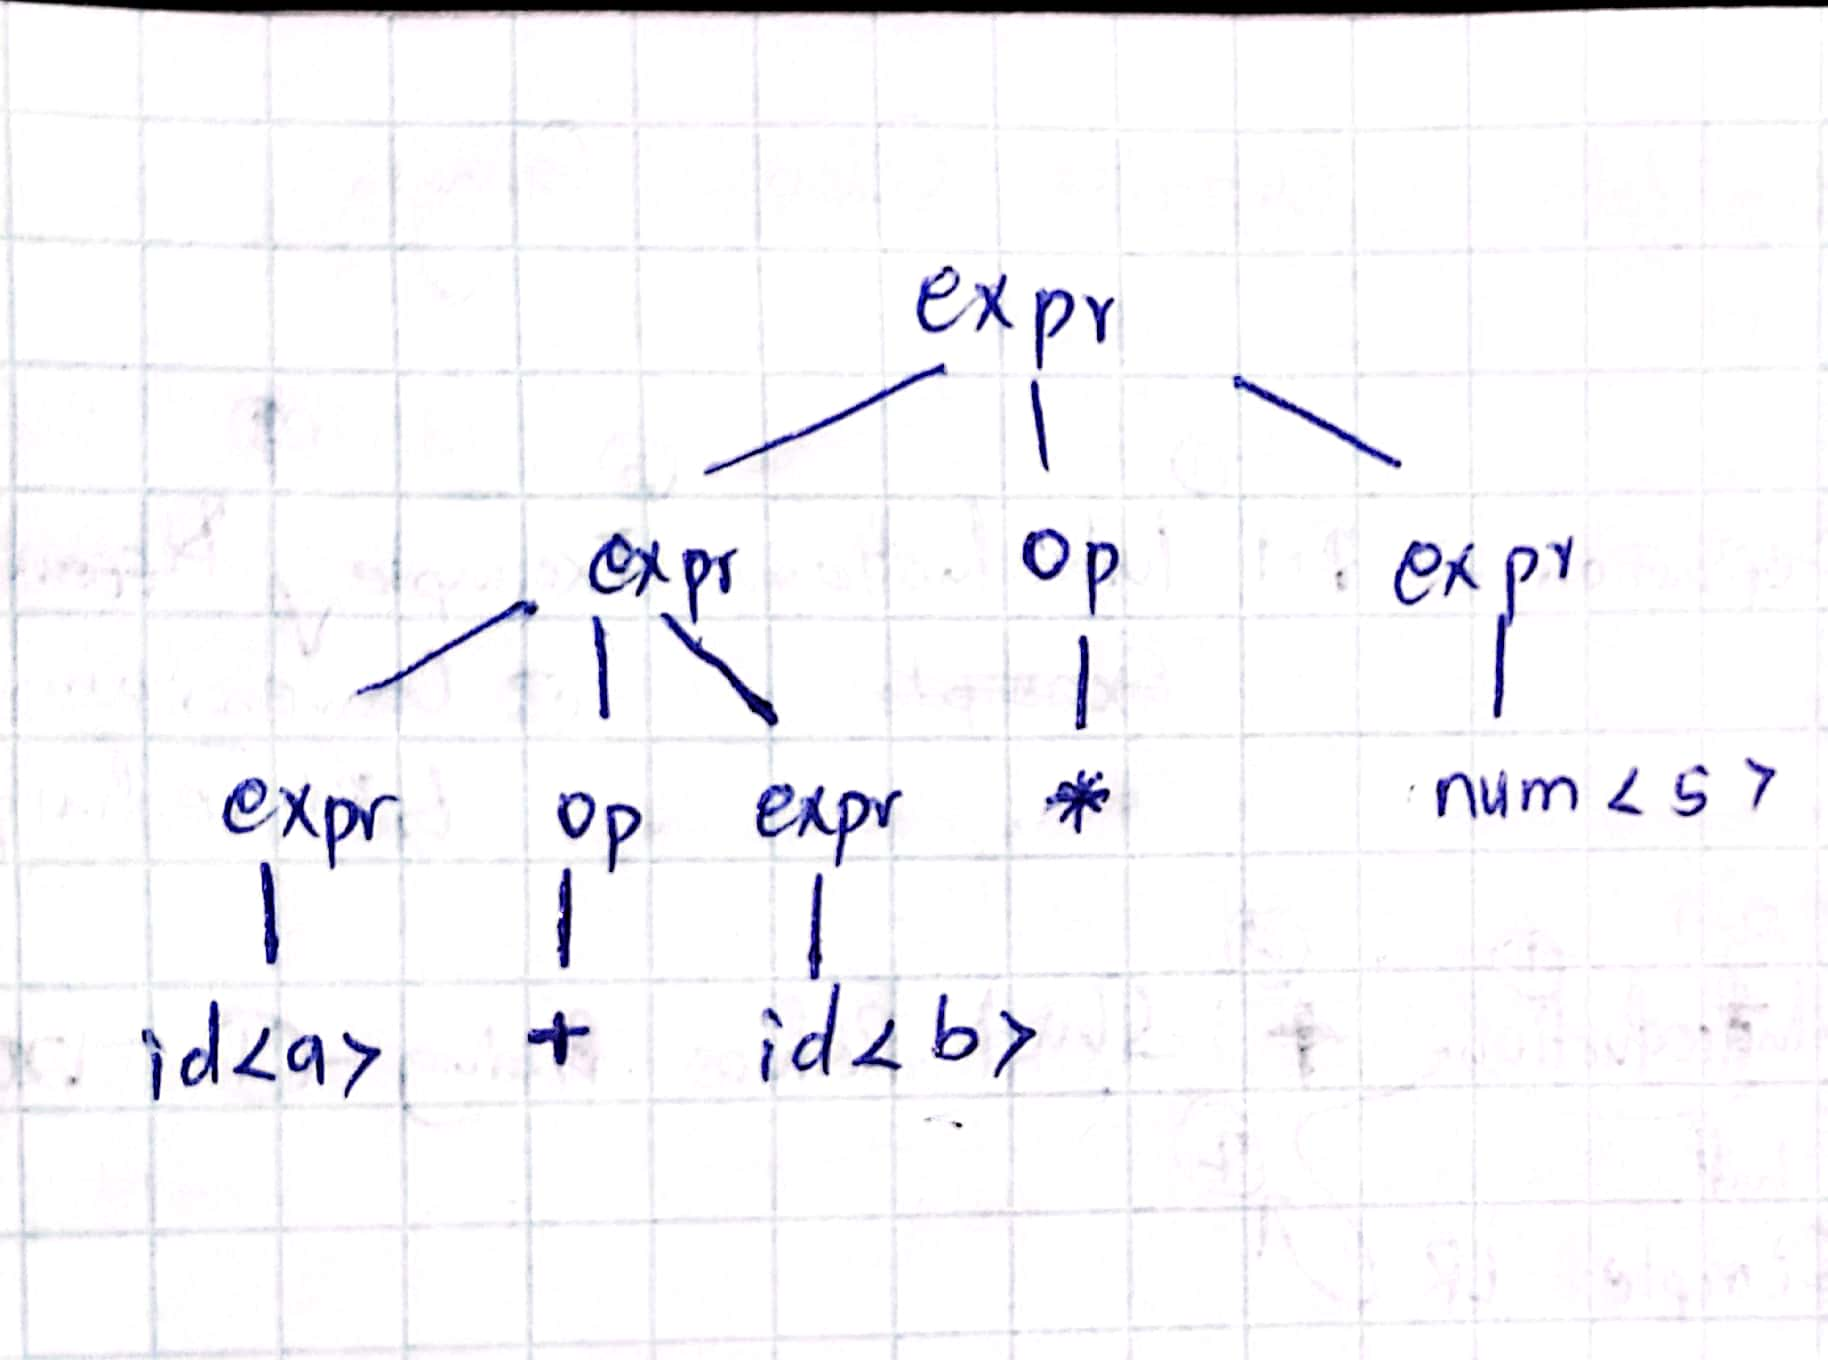


**Semantics Analysis** is the third phase of Compiler. It makes sure that declarations and statements of program are semantically correct. It is a collection of procedures which is called by parser as and when required by grammar. Both syntax tree of previous phase and symbol table are used to check the consistency of the given code.

c = a + b * 5

t1 = 5

t2 = b

t3 = t2 * t1

t4 = a

t5 = t4 + t3

t6 = c

t5 = t6

***References***

1. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwihkcrpuef6AhWggf0HHbZzCEUQFnoECBUQAw&url=https%3A%2F%2Fwww.csd.uwo.ca%2F~mmorenom%2FCS447%2FLectures%2FSyntax.html%2Fnode14.html&usg=AOvVaw0kv-vvC50mp9Q88f26Tn5v

2. https://www.gatevidyalay.com/first-and-follow-compiler-design/

3. https://gist.github.com/DmitrySoshnikov/924ceefb1784b30c5ca6

4. http://www.cs.ecu.edu/karl/5220/spr16/Notes/Top-down/LL1.html#:~:text=A%20top%2Ddown%20parser%20that,it%20uses%20one%20lookahead%20token.

5. https://www.guru99.com/syntax-analysis-parsing-types.html
6. https://www.geeksforgeeks.org/difference-between-top-down-parsing-and-bottom-up-parsing/

7. https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html

8. https://www.admb-project.org/tools/flex/compiler.pdf

9. https://www.tutorialspoint.com/compiler_design/compiler_design_syntax_analysis.htm#:~:text=A%20derivation%20is%20basically%20a,non%2Dterminal%20will%20be%20replaced.

10. https://www.geeksforgeeks.org/parse-tree-in-compiler-design/#:~:text=Parse%20tree%20is%20the%20hierarchical,springs%20using%20the%20beginning%20symbol.

11. https://www.javatpoint.com/parse-tree

12. https://www.geeksforgeeks.org/introduction-to-syntax-analysis-in-compiler-design/

13. https://www.geeksforgeeks.org/semantic-analysis-in-compiler-design/?ref=gcse

14. https://www.geeksforgeeks.org/introduction-of-lexical-analysis/?ref=gcse